## Model agent

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

#### BTC returns

In [4]:
#Reading data
df1=pd.read_csv('BTC Raw Data/BTC_FUTURES.csv')
df1['date'] = pd.to_datetime(df1['date'])

# Filter the data to keep only rows before January 1, 2025
df1 = df1[df1['date'] < pd.Timestamp('2025-01-01')]

# Optional: Reset the index
df1 = df1.reset_index(drop=True)

# Display or save the filtered dataframe
print(df1.head())
df1.head()
df1.tail()

           unix       date       symbol     open     high      low    close  \
0  1.600000e+12 2020-08-11  BTCUSD_PERP  11785.0  11785.0  11125.5  11393.5   
1  1.600000e+12 2020-08-12  BTCUSD_PERP  11393.9  11628.3  11122.6  11580.6   
2  1.600000e+12 2020-08-13  BTCUSD_PERP  11581.6  11808.1  11278.9  11795.6   
3  1.600000e+12 2020-08-14  BTCUSD_PERP  11796.7  11873.8  11652.7  11777.1   
4  1.600000e+12 2020-08-15  BTCUSD_PERP  11781.1  11999.8  11689.5  11867.8   

   volume  volume_from  marketorder_volume  marketorder_volume_from  \
0  570655  4977.814598            278625.0              2430.052268   
1  615725  5378.780166            296018.0              2584.687744   
2  798009  6901.253226            387980.0              3353.892938   
3  688690  5854.894246            345653.0              2938.640715   
4  808226  6803.053490            403977.0              3400.736110   

   tradecount  
0     23020.0  
1     18503.0  
2     23646.0  
3     18491.0  
4     21819.0  


,unix,date,symbol,open,high,low,close,volume,volume_from,marketorder_volume,marketorder_volume_from,tradecount
1586,1.740000e+12,2024-12-27,BTCUSD_PERP,95649.6,97415.7,93300.3,94140.1,31818572,33350.470650,14974454.0,15686.203670,567617.0
1587,1.740000e+12,2024-12-28,BTCUSD_PERP,94140.0,95549.9,93964.4,95125.8,9260623,9792.543625,4837943.0,5114.226749,175193.0
1588,1.740000e+12,2024-12-29,BTCUSD_PERP,95126.7,95172.7,92803.6,93519.2,11952136,12730.666810,5374906.0,5724.963937,231741.0
1589,1.740000e+12,2024-12-30,BTCUSD_PERP,93519.2,94940.0,91271.5,92640.0,38683714,41588.112330,18877349.0,20281.216990,571785.0
1590,1.740000e+12,2024-12-31,BTCUSD_PERP,92640.1,96200.0,91894.9,93422.5,25621256,27220.568130,12862597.0,13664.115800,372392.0


In [5]:
df1['close'] = df1['close'].astype(float)
df1['Return'] = df1['close'].pct_change()
df1 = df1.dropna(subset=['Return'])

C:\Users\Harsh hari\AppData\Local\Temp\ipykernel_6092\140203010.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df1['Return'] = df1['close'].pct_change()


In [6]:
df1.head()

,unix,date,symbol,open,high,low,close,volume,volume_from,marketorder_volume,marketorder_volume_from,tradecount,Return
1,1.600000e+12,2020-08-12,BTCUSD_PERP,11393.9,11628.3,11122.6,11580.6,615725,5378.780166,296018.0,2584.687744,18503.0,0.016422
2,1.600000e+12,2020-08-13,BTCUSD_PERP,11581.6,11808.1,11278.9,11795.6,798009,6901.253226,387980.0,3353.892938,23646.0,0.018566
3,1.600000e+12,2020-08-14,BTCUSD_PERP,11796.7,11873.8,11652.7,11777.1,688690,5854.894246,345653.0,2938.640715,18491.0,-0.001568
4,1.600000e+12,2020-08-15,BTCUSD_PERP,11781.1,11999.8,11689.5,11867.8,808226,6803.053490,403977.0,3400.736110,21819.0,0.007701
5,1.600000e+12,2020-08-16,BTCUSD_PERP,11868.5,11952.9,11701.6,11932.3,574629,4844.774558,295907.0,2494.791065,13648.0,0.005435


In [7]:
df1.drop(columns=['unix', 'open', 'high','low','volume_from','marketorder_volume','marketorder_volume_from','tradecount'], inplace=True)

In [8]:
df1.head()

,date,symbol,close,volume,Return
1,2020-08-12,BTCUSD_PERP,11580.6,615725,0.016422
2,2020-08-13,BTCUSD_PERP,11795.6,798009,0.018566
3,2020-08-14,BTCUSD_PERP,11777.1,688690,-0.001568
4,2020-08-15,BTCUSD_PERP,11867.8,808226,0.007701
5,2020-08-16,BTCUSD_PERP,11932.3,574629,0.005435


#### Fear and Greed Index

In [10]:
fng=pd.read_csv('BTC Raw Data/FnG_Index.csv')
fng.head()

,fng_value,fng_classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [11]:
fng['date'] = pd.to_datetime(fng['date'], format='%Y-%m-%d')
fng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fng_value           2647 non-null   int64         
 1   fng_classification  2647 non-null   object        
 2   date                2647 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.2+ KB


In [12]:
fng.head()

,fng_value,fng_classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


#### Sentiment data

In [14]:
sentiment=pd.read_csv('BTC Raw Data/BTC sentiment.csv')
sentiment.head()

,date,CryptoNews,Finbert,Final
0,2021-01-01,0,0,0
1,2021-01-02,1,1,1
2,2021-01-03,1,0,0
3,2021-01-04,-1,-1,-1
4,2021-01-05,1,1,1


In [15]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1586 non-null   object
 1   CryptoNews  1586 non-null   int64 
 2   Finbert     1586 non-null   int64 
 3   Final       1586 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 49.7+ KB


In [16]:
sentiment['date'] = pd.to_datetime(sentiment['date'], format='%Y-%m-%d')
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1586 non-null   datetime64[ns]
 1   CryptoNews  1586 non-null   int64         
 2   Finbert     1586 non-null   int64         
 3   Final       1586 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 49.7 KB


In [17]:
sentiment.drop(columns=['CryptoNews','Finbert'], inplace=True)

In [18]:
sentiment.rename(columns={'Final': 'Daily_sentiment'}, inplace=True)

In [19]:
sentiment.head()

,date,Daily_sentiment
0,2021-01-01,0
1,2021-01-02,1
2,2021-01-03,0
3,2021-01-04,-1
4,2021-01-05,1


#### On chain data

In [21]:
#Exchange netflow
btcexchangenetflow=pd.read_csv('BTC Raw Data/BTC Exchange netflow.csv')
btcexchangenetflow['Datetime'] = pd.to_datetime(btcexchangenetflow['Datetime']).dt.date
btcexchangenetflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Datetime                  4783 non-null   object 
 1   Exchange Netflow (Total)  4783 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.9+ KB


In [22]:
btcexchangenetflow['Datetime'] = pd.to_datetime(btcexchangenetflow['Datetime'], format='%Y-%m-%d')

In [23]:
btcexchangenetflow.head()

,Datetime,Exchange Netflow (Total)
0,2025-05-06,-7564.343009
1,2025-05-05,-6789.638005
2,2025-05-04,-64.423033
3,2025-05-03,1658.095874
4,2025-05-02,-4898.921194


In [24]:
#Open interest
btcopeninterest=pd.read_csv('BTC Raw Data/BTC Open Interest.csv')
btcopeninterest['Datetime'] = pd.to_datetime(btcopeninterest['Datetime']).dt.date
btcopeninterest['Datetime'] = pd.to_datetime(btcopeninterest['Datetime'], format='%Y-%m-%d')
btcopeninterest.head()

,Datetime,Open Interest
0,2025-05-06,3.239330e+10
1,2025-05-05,3.117209e+10
2,2025-05-04,3.154779e+10
3,2025-05-03,3.218062e+10
4,2025-05-02,3.332077e+10


In [25]:
#BTC MVRV ratio

In [26]:
btcmvrv=pd.read_csv('BTC Raw Data/BTC MVRV ratio.csv')
btcmvrv['Datetime'] = pd.to_datetime(btcmvrv['Datetime']).dt.date
btcmvrv['Datetime'] = pd.to_datetime(btcmvrv['Datetime'], format='%Y-%m-%d')
btcmvrv.head()

,Datetime,MVRV Ratio
0,2025-05-07,2.161986
1,2025-05-06,2.159861
2,2025-05-05,2.120196
3,2025-05-04,2.113479
4,2025-05-03,2.146577


In [27]:
# BTC Take Buy sell ratio
btctakerbuysell=pd.read_csv('BTC Raw Data/BTC Taker Buy Sell Ratio.csv')
btctakerbuysell['Datetime'] = pd.to_datetime(btctakerbuysell['Datetime']).dt.date
btctakerbuysell['Datetime'] = pd.to_datetime(btctakerbuysell['Datetime'], format='%Y-%m-%d')
btctakerbuysell.head()

,Datetime,Taker Buy Sell Ratio
0,2025-05-06,1.002248
1,2025-05-05,1.036859
2,2025-05-04,0.949426
3,2025-05-03,0.936653
4,2025-05-02,0.975906


In [28]:
# BTC takersentiment
btctakersentiment=pd.read_csv('BTC Raw Data/BTC takesentiment.csv')
btctakersentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3047 non-null   object
 1   sentiment  3047 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.7+ KB


In [29]:
btctakersentiment['datetime'] = pd.to_datetime(btctakersentiment['datetime'])

In [30]:
btctakersentiment.head()

,datetime,sentiment
0,2025-05-05,0
1,2025-05-04,0
2,2025-05-03,0
3,2025-05-02,0
4,2025-05-01,0


In [31]:
btctakersentiment.rename(columns={'datetime': 'Datetime'}, inplace=True)

In [32]:
btctakersentiment.head()

,Datetime,sentiment
0,2025-05-05,0
1,2025-05-04,0
2,2025-05-03,0
3,2025-05-02,0
4,2025-05-01,0


In [33]:
# BTC Take Buy sell ratio
btcfunding=pd.read_csv('BTC Raw Data/BTC funding rates.csv')
btcfunding['Datetime'] = pd.to_datetime(btcfunding['Datetime']).dt.date
btcfunding['Datetime'] = pd.to_datetime(btcfunding['Datetime'], format='%Y-%m-%d')
btcfunding.head()

,Datetime,Funding Rates
0,2025-05-06,0.004756
1,2025-05-05,0.000586
2,2025-05-04,-0.001169
3,2025-05-03,-0.000276
4,2025-05-02,0.001722


In [34]:
# BTC Leverage ratio
btcleverage=pd.read_csv('BTC Raw Data/BTC Leverage ratio.csv')
btcleverage['Datetime'] = pd.to_datetime(btcleverage['Datetime']).dt.date
btcleverage['Datetime'] = pd.to_datetime(btcleverage['Datetime'], format='%Y-%m-%d')
btcleverage.head()

,Datetime,Estimated Leverage Ratio
0,2025-05-05,0.251623
1,2025-05-04,0.256382
2,2025-05-03,0.257484
3,2025-05-02,0.264036
4,2025-05-01,0.267971


In [35]:
merged_df = btctakersentiment.merge(btctakerbuysell, on='Datetime', how='inner')
merged_df = merged_df.merge(btcmvrv, on='Datetime', how='inner')
merged_df = merged_df.merge(btcopeninterest, on='Datetime', how='inner')
merged_df = merged_df.merge(btcfunding, on='Datetime', how='inner')
merged_df = merged_df.merge(btcleverage, on='Datetime', how='inner')
onchain_data = merged_df.merge(btcexchangenetflow, on='Datetime', how='inner')

In [36]:
onchain_data

,Datetime,sentiment,Taker Buy Sell Ratio,MVRV Ratio,Open Interest,Funding Rates,Estimated Leverage Ratio,Exchange Netflow (Total)
0,2025-05-05,0,1.036859,2.120196,3.117209e+10,0.000586,0.251623,-6789.638005
1,2025-05-04,0,0.949426,2.113479,3.154779e+10,-0.001169,0.256382,-64.423033
2,2025-05-03,0,0.936653,2.146577,3.218062e+10,-0.000276,0.257484,1658.095874
3,2025-05-02,0,0.975906,2.171289,3.332077e+10,0.001722,0.264036,-4898.921194
4,2025-05-01,0,1.094568,2.165050,3.379963e+10,0.001677,0.267971,-2909.404863
...,...,...,...,...,...,...,...,...
2224,2019-04-03,-1,0.988037,1.139025,4.380611e+08,0.006965,0.070884,5065.697381
2225,2019-04-02,-1,1.059593,1.134322,4.641540e+08,0.017153,0.075914,12752.624928
2226,2019-04-01,-1,1.016446,0.970400,6.508406e+08,-0.022668,0.124425,-4192.108859
2227,2019-03-31,-1,1.036923,0.962248,6.185140e+08,-0.009613,0.119045,3992.239061


#### Mergining the onchain data with the news sentiment and Fear & Greed index

In [38]:
fng.rename(columns={'date': 'Datetime'}, inplace=True)
sentiment.rename(columns={'date': 'Datetime'}, inplace=True)

In [39]:
onchain_data = onchain_data.merge(fng, on='Datetime', how='inner')
indicators = onchain_data.merge(sentiment, on='Datetime', how='inner')

In [40]:
indicators

,Datetime,sentiment,Taker Buy Sell Ratio,MVRV Ratio,Open Interest,Funding Rates,Estimated Leverage Ratio,Exchange Netflow (Total),fng_value,fng_classification,Daily_sentiment
0,2025-05-05,0,1.036859,2.120196,3.117209e+10,0.000586,0.251623,-6789.638005,52,Neutral,-1
1,2025-05-04,0,0.949426,2.113479,3.154779e+10,-0.001169,0.256382,-64.423033,64,Greed,-1
2,2025-05-03,0,0.936653,2.146577,3.218062e+10,-0.000276,0.257484,1658.095874,65,Greed,1
3,2025-05-02,0,0.975906,2.171289,3.332077e+10,0.001722,0.264036,-4898.921194,67,Greed,1
4,2025-05-01,0,1.094568,2.165050,3.379963e+10,0.001677,0.267971,-2909.404863,53,Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...
1580,2021-01-05,1,1.004364,3.429965,5.203501e+09,0.030394,0.128461,774.269821,93,Extreme Greed,1
1581,2021-01-04,1,0.956869,3.273534,4.929257e+09,0.087673,0.129744,14195.378603,94,Extreme Greed,-1
1582,2021-01-03,1,0.983223,3.432224,5.442323e+09,0.087061,0.139417,18054.767295,93,Extreme Greed,0
1583,2021-01-02,1,1.019741,3.394538,5.281930e+09,0.034415,0.140622,-32968.116883,94,Extreme Greed,1


#### Final data for Model

In [42]:
df1.rename(columns={'date': 'Datetime'}, inplace=True)
btcfinaldata = df1.merge(indicators, on='Datetime', how='inner')

In [43]:
btcfinaldata

,Datetime,symbol,close,volume,Return,sentiment,Taker Buy Sell Ratio,MVRV Ratio,Open Interest,Funding Rates,Estimated Leverage Ratio,Exchange Netflow (Total),fng_value,fng_classification,Daily_sentiment
0,2021-01-01,BTCUSD_PERP,29388.9,16328000,0.015147,1,0.969892,3.160937,4.941424e+09,0.011057,0.144068,-11209.905419,94,Extreme Greed,0
1,2021-01-02,BTCUSD_PERP,32190.2,50512278,0.095318,1,1.019741,3.394538,5.281930e+09,0.034415,0.140622,-32968.116883,94,Extreme Greed,1
2,2021-01-03,BTCUSD_PERP,33080.4,50876080,0.027654,1,0.983223,3.432224,5.442323e+09,0.087061,0.139417,18054.767295,93,Extreme Greed,0
3,2021-01-04,BTCUSD_PERP,32040.1,53360185,-0.031448,1,0.956869,3.273534,4.929257e+09,0.087673,0.129744,14195.378603,94,Extreme Greed,-1
4,2021-01-05,BTCUSD_PERP,34084.7,51531582,0.063814,1,1.004364,3.429965,5.203501e+09,0.030394,0.128461,774.269821,93,Extreme Greed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,2024-12-27,BTCUSD_PERP,94140.1,31818572,-0.015781,-1,0.978473,2.313898,3.142610e+10,0.015228,0.229051,-9429.347450,74,Greed,-1
1444,2024-12-28,BTCUSD_PERP,95125.8,9260623,0.010471,-1,1.076429,2.342138,3.177712e+10,0.006785,0.229119,-2635.125997,72,Greed,0
1445,2024-12-29,BTCUSD_PERP,93519.2,11952136,-0.016889,-1,0.906335,2.295447,3.153469e+10,0.008010,0.232523,-4847.602184,73,Greed,-1
1446,2024-12-30,BTCUSD_PERP,92640.0,38683714,-0.009401,-1,0.995285,2.265168,3.127885e+10,0.012331,0.231960,6286.127606,65,Greed,0


In [44]:
btcfinaldata.to_csv('Model Output/btcfinaldata.csv')

### XGBoost regressor for BTC

In [46]:
df = pd.read_csv('Model Output/data.csv')

# Drop non-predictive columns
df.drop(columns=['Unnamed: 0', 'Datetime', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# Define features and target
X = df.drop(columns=['Return'])
y = df['Return']

# Sequential split (first 70% train, last 30% test)
split_index = int(len(df) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Sequential Test MSE: {mse:.6f}")
print(f"Sequential Test R²: {r2:.4f}")

# Generate Buy/Sell/Hold signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in y_pred]

# Create results DataFrame
results = X_test.copy()
results['Actual_Return'] = y_test.values
results['Predicted_Return'] = y_pred
results['Signal'] = signals

# Display or save
print(results.head())

Sequential Test MSE: 0.000310
Sequential Test R²: 0.4234
         volume  sentiment  Taker Buy Sell Ratio  MVRV Ratio  Open Interest  \
765  447273.494         -1              1.045630    1.171799   7.461053e+09   
766  383465.481         -1              0.967103    1.157193   7.565299e+09   
767  732295.350         -1              0.930825    1.098663   6.967909e+09   
768  439986.497         -1              0.993106    1.090820   6.978897e+09   
769  189249.667         -1              1.062752    1.102248   7.002176e+09   

     Exchange Netflow (Total)  fng_value  Daily_sentiment  Actual_Return  \
765              -3602.000230         54                1       0.020934   
766                755.870357         58                1      -0.011974   
767                110.418435         55                0      -0.050641   
768               7538.151638         48                1      -0.008021   
769               3282.132289         49                0       0.010764   

     Predic

### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("Model Output/btcfinaldata.csv")

date_column = df['Datetime']

# Drop non-useful or non-numeric columns
df.drop(columns=['Unnamed: 0', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# Feature engineering: lagged features, moving average, volatility
df['lag_return_1'] = df['Return'].shift(1)
df['lag_fng'] = df['fng_value'].shift(1)
df['ma_3'] = df['Return'].rolling(window=3).mean()
df['volatility_3'] = df['Return'].rolling(window=3).std()

# Drop rows with NaNs from rolling/lag operations
df = df.dropna()

date_column = date_column.iloc[df.index]

# Define predictors and target
X = df.drop(columns=['Return','Datetime'])
y = df['Return']

# Sequential time-based split: 70% train, 30% test
split_index = int(len(df) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest MSE: {mse:.6f}")
print(f"Random Forest R²: {r2:.4f}")

# Generate trading signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in y_pred]

# Output predictions with signals
results = X_test.copy()
results['Datetime'] = date_column.iloc[split_index:].values  # Align with X_test index
results['Actual_Return'] = y_test.values
results['Predicted_Return'] = y_pred
results['Signal'] = signals

# Save to CSV (optional)
results.to_csv("Model Output/BTC_RF.csv", index=False)

print(results.head())

Random Forest MSE: 0.000197
Random Forest R²: 0.7427
        volume  sentiment  Taker Buy Sell Ratio  MVRV Ratio  Open Interest  \
1014   2697385          1              0.996421    1.322110   8.497084e+09   
1015   5539812          1              1.149171    1.337589   8.700943e+09   
1016  31393411          1              1.059114    1.403084   8.368627e+09   
1017  12627516          1              0.967286    1.397357   8.490179e+09   
1018  10939212          1              1.021912    1.392925   8.237500e+09   

      Funding Rates  Estimated Leverage Ratio  Exchange Netflow (Total)  \
1014       0.007899                  0.215552              -2127.724817   
1015       0.005299                  0.218345              -1696.757251   
1016       0.006051                  0.201162              -3712.683223   
1017       0.001991                  0.205543              -6850.697604   
1018      -0.000223                  0.200180               -109.899447   

      fng_value  Daily_sent

In [49]:
print(results.tail())

        volume  sentiment  Taker Buy Sell Ratio  MVRV Ratio  Open Interest  \
1443  31818572         -1              0.978473    2.313898   3.142610e+10   
1444   9260623         -1              1.076429    2.342138   3.177712e+10   
1445  11952136         -1              0.906335    2.295447   3.153469e+10   
1446  38683714         -1              0.995285    2.265168   3.127885e+10   
1447  25621256         -1              1.052075    2.278388   3.120488e+10   

      Funding Rates  Estimated Leverage Ratio  Exchange Netflow (Total)  \
1443       0.015228                  0.229051              -9429.347450   
1444       0.006785                  0.229119              -2635.125997   
1445       0.008010                  0.232523              -4847.602184   
1446       0.012331                  0.231960               6286.127606   
1447       0.014428                  0.229832              -1823.474787   

      fng_value  Daily_sentiment  lag_return_1  lag_fng      ma_3  \
1443       

### MLP Regressor

MLP Test MSE: 0.011642
MLP Test R²: -20.6623
     volume  sentiment  Taker Buy Sell Ratio  MVRV Ratio  Open Interest  \
0 -0.199791  -1.302144             -0.631873   -0.787748      -0.753858   
1  1.180333  -1.302144             -1.446383   -0.868643      -1.010872   
2  0.023831  -1.302144             -0.048064   -0.879482      -1.006144   
3 -0.968195  -1.302144              1.515623   -0.863688      -0.996129   
4 -0.621858  -1.302144              0.016399   -0.868529      -1.029525   

   Exchange Netflow (Total)  fng_value  Daily_sentiment  lag_return_1  \
0                  0.061105   0.601566         1.278671      0.588320   
1                 -0.003946   0.463453        -0.010626     -0.378764   
2                  0.744644   0.141190         1.278671     -1.515107   
3                  0.315709   0.187228        -0.010626     -0.262593   
4                 -0.039678   0.233265        -1.299924      0.289452   

    lag_fng      ma_3  volatility_3  Actual_Return  Predicted_Ret

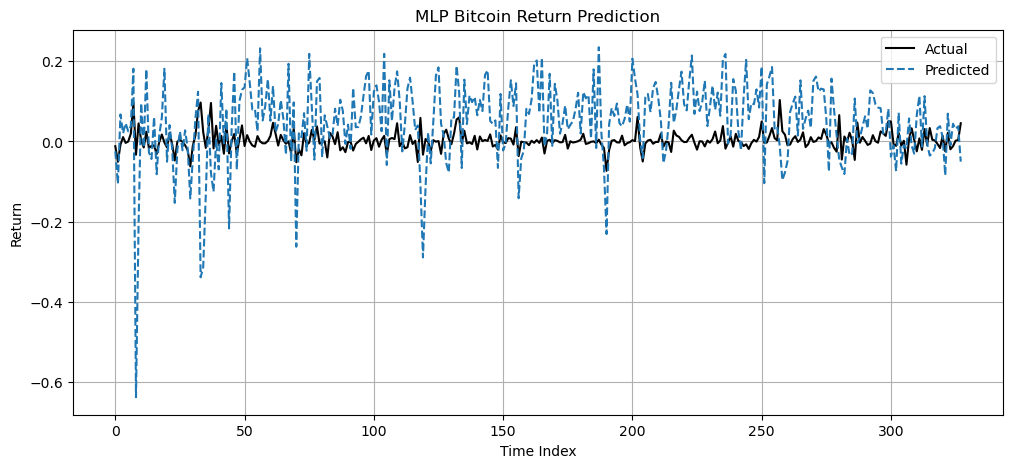

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# STEP 1: Load dataset
df = pd.read_csv("Model Output/data.csv")  # Replace with your CSV

# STEP 2: Drop irrelevant columns
df.drop(columns=['Unnamed: 0', 'Datetime', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# STEP 3: Feature engineering
df['lag_return_1'] = df['Return'].shift(1)
df['lag_fng'] = df['fng_value'].shift(1)
df['ma_3'] = df['Return'].rolling(window=3).mean()
df['volatility_3'] = df['Return'].rolling(window=3).std()
df.dropna(inplace=True)

# STEP 4: Split data
X = df.drop(columns=['Return'])
y = df['Return']

# Standardize features (important for neural nets)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sequential split: first 70% train, last 30% test
split_idx = int(len(X) * 0.7)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# STEP 5: Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',
                   solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# STEP 6: Predict and evaluate
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MLP Test MSE: {mse:.6f}")
print(f"MLP Test R²: {r2:.4f}")

# STEP 7: Create Buy/Sell/Hold signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in y_pred]

# STEP 8: Result DataFrame
results = pd.DataFrame(X_test, columns=X.columns)
results['Actual_Return'] = y_test.values
results['Predicted_Return'] = y_pred
results['Signal'] = signals
results.to_csv("Model Output/mlp_predicted_returns.csv", index=False)
print(results.head())

# STEP 9: Plot predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual", color="black")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.title("MLP Bitcoin Return Prediction")
plt.xlabel("Time Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

#### CNNs

In [53]:
!pip install pandas numpy scikit-learn tensorflow matplotlib

Epoch 1/100


D:\Harshu\Softwares\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0117
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013    
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013    
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013    
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 15/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoc

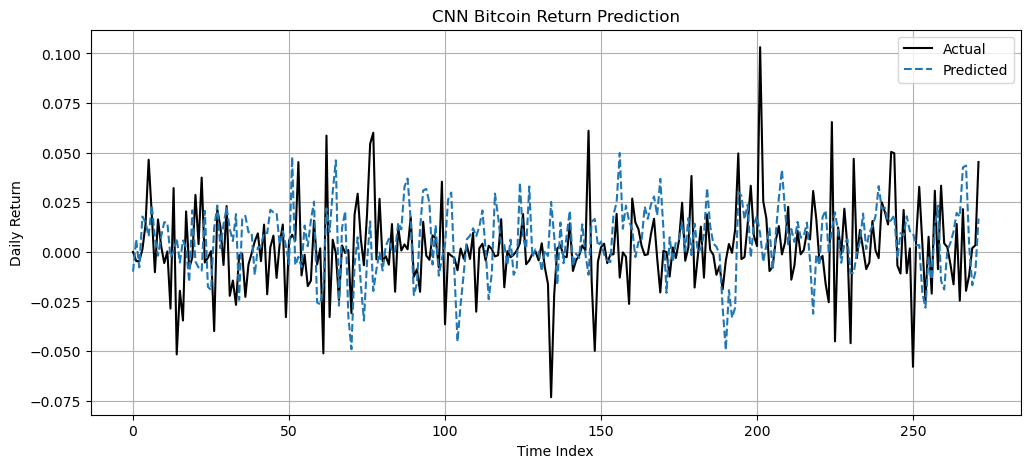

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# STEP 1: Load your dataset
df = pd.read_csv("Model Output/data.csv")  # Replace with your actual CSV file

# STEP 2: Drop non-numeric or irrelevant columns
df.drop(columns=['Unnamed: 0', 'Datetime', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# STEP 3: Feature engineering
df['lag_return_1'] = df['Return'].shift(1)
df['lag_fng'] = df['fng_value'].shift(1)
df['ma_3'] = df['Return'].rolling(window=3).mean()
df['volatility_3'] = df['Return'].rolling(window=3).std()
df.dropna(inplace=True)

# STEP 4: Define features and target
features = df.drop(columns=['Return']).columns
X = df[features].values
y = df['Return'].values

# STEP 5: Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Create sequences for CNN
def create_sequences(X, y, window_size=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, window_size=5)

# STEP 7: Sequential Train-Test Split (70%-30%)
split_idx = int(len(X_seq) * 0.75)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# STEP 8: Build CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# STEP 9: Train Model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# STEP 10: Predict and Evaluate
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.6f}")
print(f"Test R² Score: {r2:.4f}")

# STEP 11: Generate Buy/Sell/Hold Signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in y_pred]

# STEP 12: Build Result DataFrame
results = pd.DataFrame(X_test[:, -1, :], columns=features)
results['Actual_Return'] = y_test
results['Predicted_Return'] = y_pred
results['Signal'] = signals

# STEP 13: Save/Print Results
results.to_csv("Model Output/cnn_predicted_returns.csv", index=False)
print(results.head())

# STEP 14: Plot Predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual", color="black")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.title("CNN Bitcoin Return Prediction")
plt.xlabel("Time Index")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

### Random forest + LSTM ensemble

D:\Harshu\Softwares\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Hybrid Ensemble Test MSE: 0.000534
Hybrid Ensemble Test R²: 0.0076
     volume  sentiment  Taker Buy Sell Ratio  MVRV Ratio  Open Interest  \
0  0.162851        0.0              0.334457    0.123471       0.238109   
1  0.336453        0.0              0.201844    0.105304       0.188031   
2  0.190980        0.0              0.429508    0.102869       0.188953   
3  0.066196        0.0              0.684096    0.106416       0.190904   
4  0.109760        0.0              0.440004    0.105329       0.184397   

   Exchange Netflow (Total)  fng_value  Daily_sentiment  lag_return_1  \
0                  0.427249   0.584270              1.0      0.500386   
1                  0.423264   0.550562              0.5      0.406302   
2                  0.469126   0.471910              1.0      0.295751   
3                  0.442848   0.483146              0.5      0.417604   
4                  0.421075   0.494382              0.0      0.471310   

   

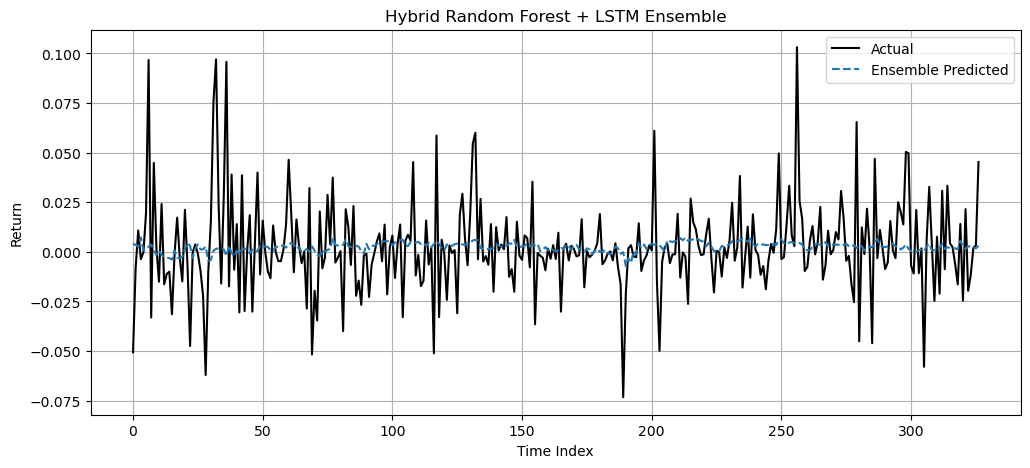

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# STEP 1: Load and prepare the dataset
df = pd.read_csv("Model Output/data.csv")
df.drop(columns=['Unnamed: 0', 'Datetime', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')
df['lag_return_1'] = df['Return'].shift(1)
df['lag_fng'] = df['fng_value'].shift(1)
df['ma_3'] = df['Return'].rolling(window=3).mean()
df['volatility_3'] = df['Return'].rolling(window=3).std()
df.dropna(inplace=True)

# STEP 2: Feature and target setup
features = df.drop(columns=['Return']).columns
X = df[features].values
y = df['Return'].values

# Normalize for LSTM only
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Create time sequences for LSTM
def create_sequences(X, y, look_back=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - look_back):
        X_seq.append(X[i:i+look_back])
        y_seq.append(y[i+look_back])
    return np.array(X_seq), np.array(y_seq)

look_back = 5
X_seq, y_seq = create_sequences(X_scaled, y, look_back)

# Sequential split: 70% train, 30% test
split_idx = int(len(X_seq) * 0.7)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# STEP 4: Train Random Forest (on last day of each window)
X_train_rf = X_train[:, -1, :]
X_test_rf = X_test[:, -1, :]
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train_rf, y_train)
rf_pred = rf_model.predict(X_test_rf)

# STEP 5: Train LSTM
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
lstm_pred = lstm_model.predict(X_test).flatten()

# STEP 6: Combine predictions (equal weight)
ensemble_pred = 0.5 * rf_pred + 0.5 * lstm_pred

# STEP 7: Evaluate performance
mse = mean_squared_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)
print(f"Hybrid Ensemble Test MSE: {mse:.6f}")
print(f"Hybrid Ensemble Test R²: {r2:.4f}")

# STEP 8: Generate Buy/Sell/Hold signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in ensemble_pred]

# STEP 9: Result DataFrame
results = pd.DataFrame(X_test_rf, columns=features)
results['Actual_Return'] = y_test
results['Ensemble_Predicted'] = ensemble_pred
results['Signal'] = signals
results.to_csv("Model Output/ensemble_predictions.csv", index=False)
print(results.head())

# STEP 10: Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual", color="black")
plt.plot(ensemble_pred, label="Ensemble Predicted", linestyle="--")
plt.title("Hybrid Random Forest + LSTM Ensemble")
plt.xlabel("Time Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
## Random forest regressor is the best regression model for this exercise

## ETH data specific

### ETH returns 

In [60]:
df2=pd.read_csv('ETH Raw Data/ETH_FUTURES.csv')
df2['date'] = pd.to_datetime(df2['date'])

# Filter the data to keep only rows before January 1, 2025
df2 = df2[df2['date'] < pd.Timestamp('2025-01-01')]

# Optional: Reset the index
df2 = df2.reset_index(drop=True)

# Display or save the filtered dataframe
print(df2.head())
df2.head()
df2.tail()

           unix       date       symbol    open    high     low   close  \
0  1.597710e+12 2020-08-18  ETHUSD_PERP  430.00  435.00  410.00  422.02   
1  1.597800e+12 2020-08-19  ETHUSD_PERP  422.72  426.42  394.90  408.50   
2  1.597880e+12 2020-08-20  ETHUSD_PERP  408.45  420.29  402.64  416.76   
3  1.597970e+12 2020-08-21  ETHUSD_PERP  416.90  419.50  383.88  388.42   
4  1.598050e+12 2020-08-22  ETHUSD_PERP  388.22  398.04  377.74  396.32   

    volume  volume_from  marketorder_volume  marketorder_volume_from  \
0   986938  23172.96215              486370              11426.69131   
1  2912351  71285.80954             1466425              35911.58368   
2  1479707  35841.94328              735758              17818.84969   
3  2033162  50442.40275              984097              24396.24450   
4  1859983  47812.51054              908930              23332.03489   

   tradecount  
0       14060  
1       36628  
2       20216  
3       25693  
4       21430  


,unix,date,symbol,open,high,low,close,volume,volume_from,marketorder_volume,marketorder_volume_from,tradecount
1579,1.735260e+12,2024-12-27,ETHUSD_PERP,3330.73,3439.00,3303.15,3329.25,143845940,428244.6899,73929433,220114.48800,667869
1580,1.735340e+12,2024-12-28,ETHUSD_PERP,3329.25,3422.95,3318.19,3398.81,56395169,167644.1471,28189695,83772.46312,325008
1581,1.735430e+12,2024-12-29,ETHUSD_PERP,3398.81,3409.46,3318.45,3350.37,51432281,152780.9121,23752824,70539.68451,330568
1582,1.735520e+12,2024-12-30,ETHUSD_PERP,3350.37,3431.00,3295.48,3355.68,137542744,408180.2689,65965148,195683.82480,621073
1583,1.735600e+12,2024-12-31,ETHUSD_PERP,3355.68,3448.47,3310.18,3331.88,101186692,299895.0536,47966820,142119.15440,467301


In [61]:
df2['close'] = df2['close'].astype(float)
df2['Return'] = df2['close'].pct_change()
df2 = df2.dropna(subset=['Return'])

In [62]:
df2.drop(columns=['unix', 'open', 'high','low','volume_from','marketorder_volume','marketorder_volume_from','tradecount'], inplace=True)

In [63]:
df2.head()

,date,symbol,close,volume,Return
1,2020-08-19,ETHUSD_PERP,408.50,2912351,-0.032036
2,2020-08-20,ETHUSD_PERP,416.76,1479707,0.020220
3,2020-08-21,ETHUSD_PERP,388.42,2033162,-0.068001
4,2020-08-22,ETHUSD_PERP,396.32,1859983,0.020339
5,2020-08-23,ETHUSD_PERP,390.94,1538096,-0.013575


#### Onchain data

In [65]:
ethexchangenetflow=pd.read_csv('ETH Raw Data/Ethereum Exchange Netflow.csv')
ethexchangenetflow['Datetime'] = pd.to_datetime(ethexchangenetflow['Datetime']).dt.date
ethexchangenetflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3561 entries, 0 to 3560
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Datetime                  3561 non-null   object 
 1   Exchange Netflow (Total)  3561 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.8+ KB


In [66]:
ethexchangenetflow['Datetime'] = pd.to_datetime(ethexchangenetflow['Datetime'], format='%Y-%m-%d')

In [67]:
ethexchangenetflow.head()

,Datetime,Exchange Netflow (Total)
0,2025-05-06,-67916.792552
1,2025-05-05,-12028.117012
2,2025-05-04,24475.502954
3,2025-05-03,-2638.560647
4,2025-05-02,-28863.348689


In [68]:
#Open interest
ethopeninterest=pd.read_csv('ETH Raw Data/Ethereum Open Interest.csv')
ethopeninterest['Datetime'] = pd.to_datetime(ethopeninterest['Datetime']).dt.date
ethopeninterest['Datetime'] = pd.to_datetime(ethopeninterest['Datetime'], format='%Y-%m-%d')
ethopeninterest.head()

,Datetime,Open Interest
0,2025-05-06,1.152756e+10
1,2025-05-05,1.161579e+10
2,2025-05-04,1.145831e+10
3,2025-05-03,1.153668e+10
4,2025-05-02,1.174967e+10


In [69]:
# BTC Take Buy sell ratio
ethtakerbuysell=pd.read_csv('ETH Raw Data/Ethereum Taker Buy Sell Ratio.csv')
ethtakerbuysell['Datetime'] = pd.to_datetime(btctakerbuysell['Datetime']).dt.date
ethtakerbuysell['Datetime'] = pd.to_datetime(btctakerbuysell['Datetime'], format='%Y-%m-%d')
ethtakerbuysell.head()

,Datetime,Taker Buy Sell Ratio
0,2025-05-06,0.939185
1,2025-05-05,0.977943
2,2025-05-04,0.954536
3,2025-05-03,0.950572
4,2025-05-02,0.991101


In [70]:
#Ethereum gas price
ethgasprice=pd.read_csv('ETH Raw Data/Ethereum Gas Price.csv')
ethgasprice['Datetime'] = pd.to_datetime(ethgasprice['Datetime']).dt.date
ethgasprice['Datetime'] = pd.to_datetime(ethgasprice['Datetime'], format='%Y-%m-%d')
ethgasprice.head()

,Datetime,Gas Price (Mean)
0,2025-05-07,2.824304
1,2025-05-06,2.234146
2,2025-05-05,1.660349
3,2025-05-04,1.610348
4,2025-05-03,1.600286


In [71]:
# Ethereum takersentiment
ethtakersentiment=pd.read_csv('ETH Raw Data/eth_taker_sentiment.csv')
ethtakersentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3047 non-null   object
 1   sentiment  3047 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.7+ KB


In [72]:
ethtakersentiment['datetime'] = pd.to_datetime(ethtakersentiment['datetime'])
ethtakersentiment.rename(columns={'datetime': 'Datetime'}, inplace=True)

In [73]:
ethtakersentiment.head()

,Datetime,sentiment
0,2025-05-05,1
1,2025-05-04,1
2,2025-05-03,1
3,2025-05-02,1
4,2025-05-01,1


In [74]:
#Ethereum Leverage ratio
ethleverage=pd.read_csv('ETH Raw Data/Ethereum Leverage Ratio.csv')
ethleverage['Datetime'] = pd.to_datetime(ethleverage['Datetime']).dt.date
ethleverage['Datetime'] = pd.to_datetime(ethleverage['Datetime'], format='%Y-%m-%d')
ethleverage.head()

,Datetime,Estimated Leverage Ratio
0,2025-05-05,0.724914
1,2025-05-04,0.718052
2,2025-05-03,0.716495
3,2025-05-02,0.725416
4,2025-05-01,0.751239


In [75]:
#Ethereum Funding rates
ethfundingrates=pd.read_csv('ETH Raw Data/Ethereum Funding Rates.csv')
ethfundingrates['Datetime'] = pd.to_datetime(ethfundingrates['Datetime']).dt.date
ethfundingrates['Datetime'] = pd.to_datetime(ethfundingrates['Datetime'], format='%Y-%m-%d')
ethfundingrates.head()

,Datetime,Funding Rates
0,2025-05-06,0.005972
1,2025-05-05,-0.000323
2,2025-05-04,-0.002810
3,2025-05-03,0.006251
4,2025-05-02,0.006081


In [76]:
merged_df1 = btctakersentiment.merge(ethtakerbuysell, on='Datetime', how='inner')
merged_df1 = merged_df1.merge(ethgasprice, on='Datetime', how='inner')
merged_df1 = merged_df1.merge(ethopeninterest, on='Datetime', how='inner')
merged_df1 = merged_df1.merge(ethleverage, on='Datetime', how='inner')
merged_df1 = merged_df1.merge(ethfundingrates, on='Datetime', how='inner')
ethonchain_data = merged_df1.merge(ethexchangenetflow, on='Datetime', how='inner')

In [77]:
ethonchain_data

,Datetime,sentiment,Taker Buy Sell Ratio,Gas Price (Mean),Open Interest,Estimated Leverage Ratio,Funding Rates,Exchange Netflow (Total)
0,2025-05-05,0,0.977943,1.660349,1.161579e+10,0.724914,-0.000323,-12028.117012
1,2025-05-04,0,0.954536,1.610348,1.145831e+10,0.718052,-0.002810,24475.502954
2,2025-05-03,0,0.950572,1.600286,1.153668e+10,0.716495,0.006251,-2638.560647
3,2025-05-02,0,0.991101,1.922045,1.174967e+10,0.725416,0.006081,-28863.348689
4,2025-05-01,0,1.040761,2.274470,1.218862e+10,0.751239,0.007914,-20096.023559
...,...,...,...,...,...,...,...,...
2224,2019-04-03,-1,0.995285,16.724790,1.026851e+08,0.046190,0.073732,88901.851400
2225,2019-04-02,-1,1.109520,13.831754,1.304568e+08,0.057426,0.028789,300313.286703
2226,2019-04-01,-1,0.894975,12.504161,1.059755e+08,0.054864,0.005782,-323.444816
2227,2019-03-31,-1,1.005966,10.506785,1.091728e+08,0.056091,0.010566,37527.560376


In [78]:
fng.rename(columns={'date': 'Datetime'}, inplace=True)
sentiment.rename(columns={'date': 'Datetime'}, inplace=True)
ethonchain_data = ethonchain_data.merge(fng, on='Datetime', how='inner')
ethindicators = ethonchain_data.merge(sentiment, on='Datetime', how='inner')

In [79]:
ethindicators

,Datetime,sentiment,Taker Buy Sell Ratio,Gas Price (Mean),Open Interest,Estimated Leverage Ratio,Funding Rates,Exchange Netflow (Total),fng_value,fng_classification,Daily_sentiment
0,2025-05-05,0,0.977943,1.660349,1.161579e+10,0.724914,-0.000323,-12028.117012,52,Neutral,-1
1,2025-05-04,0,0.954536,1.610348,1.145831e+10,0.718052,-0.002810,24475.502954,64,Greed,-1
2,2025-05-03,0,0.950572,1.600286,1.153668e+10,0.716495,0.006251,-2638.560647,65,Greed,1
3,2025-05-02,0,0.991101,1.922045,1.174967e+10,0.725416,0.006081,-28863.348689,67,Greed,1
4,2025-05-01,0,1.040761,2.274470,1.218862e+10,0.751239,0.007914,-20096.023559,53,Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...
1580,2021-01-05,1,1.016561,138.112230,2.132911e+09,0.118535,0.090046,33686.177746,93,Extreme Greed,1
1581,2021-01-04,1,1.019786,259.288889,2.048629e+09,0.119958,0.231788,396088.039749,94,Extreme Greed,-1
1582,2021-01-03,1,1.034732,170.434675,1.873096e+09,0.116822,0.132982,434740.550729,93,Extreme Greed,0
1583,2021-01-02,1,1.030223,102.597133,1.432395e+09,0.114843,0.040156,41973.201719,94,Extreme Greed,1


In [80]:
df2.rename(columns={'date': 'Datetime'}, inplace=True)
ethfinaldata = df2.merge(ethindicators, on='Datetime', how='inner')

In [81]:
ethfinaldata

,Datetime,symbol,close,volume,Return,sentiment,Taker Buy Sell Ratio,Gas Price (Mean),Open Interest,Estimated Leverage Ratio,Funding Rates,Exchange Netflow (Total),fng_value,fng_classification,Daily_sentiment
0,2021-01-01,ETHUSD_PERP,730.51,42816163,-0.009451,1,1.043178,66.554915,1.376190e+09,0.117057,0.016093,110238.311567,94,Extreme Greed,0
1,2021-01-02,ETHUSD_PERP,775.08,93771320,0.061012,1,1.030223,102.597133,1.432395e+09,0.114843,0.040156,41973.201719,94,Extreme Greed,1
2,2021-01-03,ETHUSD_PERP,978.75,197899879,0.262773,1,1.034732,170.434675,1.873096e+09,0.116822,0.132982,434740.550729,93,Extreme Greed,0
3,2021-01-04,ETHUSD_PERP,1042.87,250664230,0.065512,1,1.019786,259.288889,2.048629e+09,0.119958,0.231788,396088.039749,94,Extreme Greed,-1
4,2021-01-05,ETHUSD_PERP,1104.47,193512385,0.059068,1,1.016561,138.112230,2.132911e+09,0.118535,0.090046,33686.177746,93,Extreme Greed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,2024-12-27,ETHUSD_PERP,3329.25,143845940,-0.000483,-1,1.014946,7.709955,1.802705e+10,0.552623,0.015602,-18679.896991,74,Greed,-1
1444,2024-12-28,ETHUSD_PERP,3398.81,56395169,0.020894,-1,1.084824,5.991375,1.857883e+10,0.557303,0.010400,10820.141535,72,Greed,0
1445,2024-12-29,ETHUSD_PERP,3350.37,51432281,-0.014252,-1,0.928001,5.790900,1.822772e+10,0.560152,0.008275,-101576.021726,73,Greed,-1
1446,2024-12-30,ETHUSD_PERP,3355.68,137542744,0.001585,-1,0.965592,8.431893,1.839939e+10,0.561670,0.015643,113433.590961,65,Greed,0


In [82]:
ethfinaldata.to_csv('Model Output/ethfinaldata.csv')

In [83]:
from sklearn.ensemble import RandomForestRegressor
dfe = pd.read_csv("Model Output/ethfinaldata.csv")

date_column = dfe['Datetime']

# Drop non-useful or non-numeric columns
dfe.drop(columns=['Unnamed: 0', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# Feature engineering: lagged features, moving average, volatility
dfe['lag_return_1'] = dfe['Return'].shift(1)
dfe['lag_fng'] = dfe['fng_value'].shift(1)
dfe['ma_3'] = dfe['Return'].rolling(window=3).mean()
dfe['volatility_3'] = dfe['Return'].rolling(window=3).std()

# Drop rows with NaNs from rolling/lag operations
dfe = dfe.dropna()

date_column = date_column.iloc[dfe.index]

# Define predictors and target
X = dfe.drop(columns=['Return','Datetime'])
y = dfe['Return']

# Sequential time-based split: 70% train, 30% test
split_index = int(len(dfe) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest MSE: {mse:.6f}")
print(f"Random Forest R²: {r2:.4f}")

# Generate trading signals
signals = ['Buy' if r > 0.001 else 'Sell' if r < -0.001 else 'Hold' for r in y_pred]

# Output predictions with signals
results = X_test.copy()
results['Datetime'] = date_column.iloc[split_index:].values  # Align with X_test index
results['Actual_Return'] = y_test.values
results['Predicted_Return'] = y_pred
results['Signal'] = signals

# Save to CSV (optional)
results.to_csv("Model Output/ETH_RF.csv", index=False)

print(results.head())

Random Forest MSE: 0.000377
Random Forest R²: 0.6611
        volume  sentiment  Taker Buy Sell Ratio  Gas Price (Mean)  \
1014  11663902          1              1.073465          7.940854   
1015  20471231          1              1.037293          8.599935   
1016  85291767          1              1.042487         14.850236   
1017  31771566          1              0.941945         12.340605   
1018  28456722          1              1.015905         12.820216   

      Open Interest  Estimated Leverage Ratio  Funding Rates  \
1014   4.160054e+09                  0.255090       0.007579   
1015   4.169547e+09                  0.255496       0.004972   
1016   4.076070e+09                  0.243499       0.003459   
1017   4.070718e+09                  0.248901       0.002787   
1018   4.059151e+09                  0.248297       0.003291   

      Exchange Netflow (Total)  fng_value  Daily_sentiment  lag_return_1  \
1014             -16468.257193         47                1      0.00811

In [84]:
print(results.tail())

         volume  sentiment  Taker Buy Sell Ratio  Gas Price (Mean)  \
1443  143845940         -1              1.014946          7.709955   
1444   56395169         -1              1.084824          5.991375   
1445   51432281         -1              0.928001          5.790900   
1446  137542744         -1              0.965592          8.431893   
1447  101186692         -1              1.014809         11.362909   

      Open Interest  Estimated Leverage Ratio  Funding Rates  \
1443   1.802705e+10                  0.552623       0.015602   
1444   1.857883e+10                  0.557303       0.010400   
1445   1.822772e+10                  0.560152       0.008275   
1446   1.839939e+10                  0.561670       0.015643   
1447   1.848338e+10                  0.566906       0.011462   

      Exchange Netflow (Total)  fng_value  Daily_sentiment  lag_return_1  \
1443             -18679.896991         74               -1     -0.046591   
1444              10820.141535         72 

### OLS regression to understand the overall effect

In [86]:
import statsmodels.api as sm

btcfinaldata.drop(columns=['Unnamed: 0', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# Feature engineering: lagged features, moving average, volatility
btcfinaldata['lag_return_1'] = btcfinaldata['Return'].shift(1)
btcfinaldata['lag_fng'] = btcfinaldata['fng_value'].shift(1)
btcfinaldata['ma_3'] = btcfinaldata['Return'].rolling(window=3).mean()
btcfinaldata['volatility_3'] = btcfinaldata['Return'].rolling(window=3).std()

btcfinaldata = btcfinaldata.dropna()
# Example: assuming you want to predict 'Return' using several features
# Step 1: Define predictors (X) and target (y)
features = ['volume', 'sentiment', 'Taker Buy Sell Ratio', 'MVRV Ratio', 
            'Open Interest', 'Funding Rates', 'Estimated Leverage Ratio',
            'Exchange Netflow (Total)', 'fng_value', 'Daily_sentiment',
            'lag_return_1', 'lag_fng', 'ma_3', 'volatility_3']

X = btcfinaldata[features]
y = btcfinaldata['Return']  # Or another target variable

# Step 2: Add constant (intercept term)
X = sm.add_constant(X)

# Step 3: Fit OLS model
model = sm.OLS(y, X).fit()

# Step 4: Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     247.2
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        12:48:24   Log-Likelihood:                 3782.5
No. Observations:                1446   AIC:                            -7535.
Df Residuals:                    1431   BIC:                            -7456.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
import statsmodels.api as sm

ethfinaldata.drop(columns=['Unnamed: 0', 'symbol', 'close', 'fng_classification'], inplace=True, errors='ignore')

# Feature engineering: lagged features, moving average, volatility
ethfinaldata['lag_return_1'] = ethfinaldata['Return'].shift(1)
ethfinaldata['lag_fng'] = ethfinaldata['fng_value'].shift(1)
ethfinaldata['ma_3'] = ethfinaldata['Return'].rolling(window=3).mean()
ethfinaldata['volatility_3'] = ethfinaldata['Return'].rolling(window=3).std()

ethfinaldata = ethfinaldata.dropna()
# Example: assuming you want to predict 'Return' using several features
# Step 1: Define predictors (X) and target (y)
features = ['volume', 'sentiment', 'Taker Buy Sell Ratio', 'Gas Price (Mean)', 
            'Open Interest', 'Funding Rates', 'Estimated Leverage Ratio',
            'Exchange Netflow (Total)', 'fng_value', 'Daily_sentiment',
            'lag_return_1', 'lag_fng', 'ma_3', 'volatility_3']

X = ethfinaldata[features]
y = ethfinaldata['Return']  # Or another target variable

# Step 2: Add constant (intercept term)
X = sm.add_constant(X)

# Step 3: Fit OLS model
model = sm.OLS(y, X).fit()

# Step 4: Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     197.7
Date:                Fri, 09 May 2025   Prob (F-statistic):          5.58e-322
Time:                        12:48:24   Log-Likelihood:                 3299.5
No. Observations:                1446   AIC:                            -6569.
Df Residuals:                    1431   BIC:                            -6490.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   